In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cmocean
import warnings

warnings.filterwarnings("ignore")

## Regrid WAO13 to OM4_05

In [2]:
import xesmf

In [3]:
gridOM4 = xr.open_zarr('/archive/Raphael.Dussin/runs_forcings/OM4_05.ERAinterim/ocean_static', consolidated=True)

In [4]:
WOA13 = xr.open_dataset('/archive/gold/datasets/obs/WOA13/WOA13_ptemp+salinity_annual_35levels.nc', decode_times=False)

In [5]:
regrid = xesmf.Regridder(WOA13, gridOM4.rename({'geolon':'lon', 'geolat':'lat'}),
                                               periodic=True, method='bilinear')

In [6]:
WOA13_05 = regrid(WOA13)

using dimensions ('lat', 'lon') from data variable ptemp as the horizontal dimensions for this dataset.


## Load data

In [7]:
interim = xr.open_zarr('/archive/Raphael.Dussin/runs_forcings/OM4_05.ERAinterim/ocean_annual', consolidated=True)

In [8]:
interim_0netfw = xr.open_zarr('/archive/Raphael.Dussin/runs_forcings/OM4_05.ERAinterim_0netfw/ocean_annual', consolidated=True)

In [9]:
BP = xr.open_zarr('/archive/Raphael.Dussin/runs_forcings/OM4_05.BlendPrecip/ocean_annual', consolidated=True)

In [10]:
BP0 = xr.open_zarr('/archive/Raphael.Dussin/runs_forcings/OM4_05.Blend_precip_0netfw/ocean_annual', consolidated=True)

In [12]:
GPCP = xr.open_zarr('/archive/Raphael.Dussin/runs_forcings/OM4_05.GPCP/ocean_annual', consolidated=True)

In [13]:
GPCP0 = xr.open_zarr('/archive/Raphael.Dussin/runs_forcings/OM4_05.GPCP_0netfw/ocean_annual', consolidated=True)

In [14]:
def fix_coords(ds):
    ds.assign_coords({'lon': gridOM4['geolon'],
                      'lat': gridOM4['geolat']})
    return ds

interim = fix_coords(interim)
interim_0netfw = fix_coords(interim_0netfw)
BP = fix_coords(BP)
BP0 = fix_coords(BP0)
GPCP = fix_coords(GPCP)
GPCP0 = fix_coords(GPCP0)

In [15]:
WOA_SSS = WOA13_05['salinity'].isel(z_l=0)
SSS_bias_ERAinterim = interim['sos'].mean(dim='time') - WOA_SSS
SSS_bias_ERAinterim_0net = interim_0netfw['sos'].mean(dim='time') - WOA_SSS
SSS_bias_BP = BP['sos'].mean(dim='time') - WOA_SSS
SSS_bias_BP0 = BP0['sos'].mean(dim='time') - WOA_SSS
SSS_bias_GPCP = GPCP['sos'].mean(dim='time') - WOA_SSS
SSS_bias_GPCP0 = GPCP0['sos'].mean(dim='time') - WOA_SSS

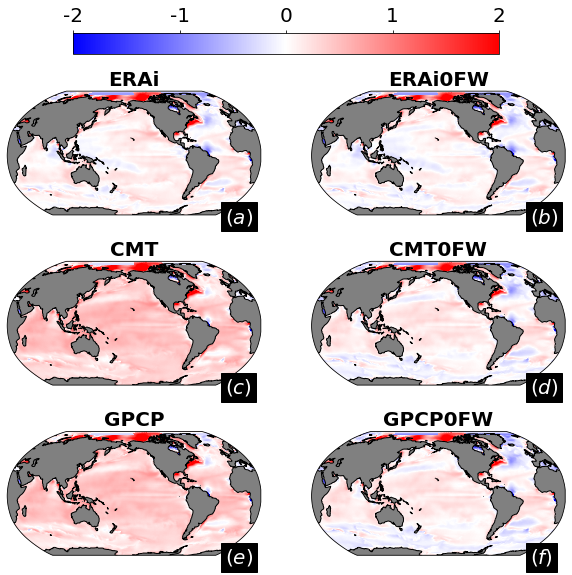

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(10, 12),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude=205)))
gs = axs[1, 1].get_gridspec()

# remove the underlying axes
for ax in axs[0, 0:]:
    ax.remove()
#axbig = fig.add_subplot(gs[0, 0:], projection=ccrs.Robinson(central_longitude=205))
axbig = fig.add_subplot(gs[0, 0:])

#axbig.pcolormesh(WOA_SSS.lon, WOA_SSS.lat, WOA_SSS.squeeze(),
#                 cmap=cmocean.cm.haline, vmin=30, vmax=40, transform=ccrs.PlateCarree())

C1 = axs[1,0].pcolormesh(SSS_bias_ERAinterim.lon, SSS_bias_ERAinterim.lat, SSS_bias_ERAinterim.squeeze(),
                    cmap='bwr', vmin=-2, vmax=2, transform=ccrs.PlateCarree())

cbar = plt.colorbar(C1, orientation='horizontal', ticks=[-2,-1,0,1,2])
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.set_xticklabels(['-2', '-1', '0', '1', '2'], fontsize=20)

axs[1,1].pcolormesh(SSS_bias_ERAinterim_0net.lon, SSS_bias_ERAinterim_0net.lat, SSS_bias_ERAinterim_0net.squeeze(),
                    cmap='bwr', vmin=-2, vmax=2, transform=ccrs.PlateCarree())

axs[2,0].pcolormesh(SSS_bias_BP.lon, SSS_bias_BP.lat, SSS_bias_BP.squeeze(),
                    cmap='bwr', vmin=-2, vmax=2, transform=ccrs.PlateCarree())
axs[2,1].pcolormesh(SSS_bias_BP0.lon, SSS_bias_BP0.lat, SSS_bias_BP0.squeeze(),
                    cmap='bwr', vmin=-2, vmax=2, transform=ccrs.PlateCarree())

axs[3,0].pcolormesh(SSS_bias_GPCP.lon, SSS_bias_GPCP.lat, SSS_bias_GPCP.squeeze(),
                    cmap='bwr', vmin=-2, vmax=2, transform=ccrs.PlateCarree())
axs[3,1].pcolormesh(SSS_bias_GPCP0.lon, SSS_bias_GPCP0.lat, SSS_bias_GPCP0.squeeze(),
                    cmap='bwr', vmin=-2, vmax=2, transform=ccrs.PlateCarree())


# hide the big plot so we only see the colorbar
axbig.set_visible(False)

axs[1,0].coastlines()
axs[1,1].coastlines()
axs[2,0].coastlines()
axs[2,1].coastlines()
axs[3,0].coastlines()
axs[3,1].coastlines()

axs[1,0].set_facecolor([0.5,0.5,0.5])
axs[1,1].set_facecolor([0.5,0.5,0.5])
axs[2,0].set_facecolor([0.5,0.5,0.5])
axs[2,1].set_facecolor([0.5,0.5,0.5])
axs[3,0].set_facecolor([0.5,0.5,0.5])
axs[3,1].set_facecolor([0.5,0.5,0.5])

axs[1,0].set_title('ERAi', fontsize=20, weight='bold')
axs[1,1].set_title('ERAi0FW', fontsize=20, weight='bold')
axs[2,0].set_title('CMT', fontsize=20, weight='bold')
axs[2,1].set_title('CMT0FW', fontsize=20, weight='bold')
axs[3,0].set_title('GPCP', fontsize=20, weight='bold')
axs[3,1].set_title('GPCP0FW', fontsize=20, weight='bold')


axs[1,0].text(15, -65, '$(a)$',
            verticalalignment='top',
            horizontalalignment='left',
            transform=ccrs.PlateCarree(),
            bbox={'facecolor': 'black'},
            color='white', fontsize=20)

axs[1,1].text(15, -65, '$(b)$',
            verticalalignment='top',
            horizontalalignment='left',
            transform=ccrs.PlateCarree(),
            bbox={'facecolor': 'black'},
            color='white', fontsize=20)

axs[2,0].text(15, -65, '$(c)$',
            verticalalignment='top',
            horizontalalignment='left',
            transform=ccrs.PlateCarree(),
            bbox={'facecolor': 'black'},
            color='white', fontsize=20)

axs[2,1].text(15, -65, '$(d)$',
            verticalalignment='top',
            horizontalalignment='left',
            transform=ccrs.PlateCarree(),
            bbox={'facecolor': 'black'},
            color='white', fontsize=20)

axs[3,0].text(15, -65, '$(e)$',
            verticalalignment='top',
            horizontalalignment='left',
            transform=ccrs.PlateCarree(),
            bbox={'facecolor': 'black'},
            color='white', fontsize=20)

axs[3,1].text(15, -65, '$(f)$',
            verticalalignment='top',
            horizontalalignment='left',
            transform=ccrs.PlateCarree(),
            bbox={'facecolor': 'black'},
            color='white', fontsize=20)

plt.savefig('SSS_bias_multi_correct.png', bbox_inches='tight', facecolor='w', edgecolor='w', transparent=False)

In [ ]:
#Idee: look for RMSE in monthly bias to see if the Onetfw mess up the seasonal cycle

In [ ]:
# Idee: look at SSH variability

In [ ]:
# I need to show that blend performs better than GPCP: find a seasonal metrics or high freq

In [ ]:
interim_daily = xr.open_zarr('/archive/Raphael.Dussin/runs_forcings/OM4_05.ERAinterim/ocean_daily', consolidated=True)

In [ ]:
interim_daily_0netfw = xr.open_zarr('/archive/Raphael.Dussin/runs_forcings/OM4_05.ERAinterim_0netfw/ocean_daily', consolidated=True)

In [ ]:
interim_daily = interim_daily.chunk({'time': 365})

In [ ]:
interim_daily_0netfw = interim_daily_0netfw.chunk({'time': 365})

In [ ]:
def ssh_rmse(ds):
    "compute anomaly to each year and RMS"
    yearly_mean_ssh = ds["zos"].groupby(ds.time.dt.year).mean(dim="time")
    anom_to_yearly = ds["zos"].groupby(ds.time.dt.year) - yearly_mean_ssh
    mse = (anom_to_yearly*anom_to_yearly).mean(dim='time')
    rmse = xr.apply_ufunc(np.sqrt, mse, dask='parallelized',output_dtypes=mse.dtype)
    return rmse

In [ ]:
rmse_ssh_interim = ssh_rmse(interim_daily)

In [ ]:
rmse_ssh_interim_0netfw = ssh_rmse(interim_daily_0netfw)

## start the dask cluster

In [ ]:
from dask.distributed import Client

client = Client("tcp://140.208.147.156:35627")
client

In [ ]:
rmse_ssh_interim.load()

In [ ]:
rmse_ssh_interim_0netfw.load()

In [ ]:
rmse_ssh_interim.plot(cmap='Reds')

In [ ]:
rmse_ssh_interim_0netfw.plot()

In [ ]:
(rmse_ssh_interim_0netfw - rmse_ssh_interim).plot(vmin=-0.01, vmax=0.01, cmap='bwr')

In [ ]:
(rmse_ssh_interim_0netfw-rmse_ssh_interim).mean(dim=['xh', 'yh']).values

In [ ]:
WOA_SSS = WOA13_05['salinity'].isel(z_l=0)
SSS_bias_ERAinterim = interim['sos'].sel(time=slice('1998', '2018')).mean(dim='time') - WOA_SSS
SSS_bias_ERAinterim_0net = interim_0netfw['sos'].sel(time=slice('1998', '2018')).mean(dim='time') - WOA_SSS
SSS_bias_BP = BP['sos'].sel(time=slice('1998', '2018')).mean(dim='time') - WOA_SSS
SSS_bias_BPR = BPR['sos'].sel(time=slice('1998', '2018')).mean(dim='time') - WOA_SSS
SSS_bias_BPR0 = BPR0['sos'].sel(time=slice('1998', '2018')).mean(dim='time') - WOA_SSS

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[20,10])
WOA_SSS.plot(ax=axs[0,0],x='lon',y='lat', vmin=20, vmax=40)
SSS_bias_ERAinterim.plot(ax=axs[0,1],x='lon',y='lat',cmap='bwr',vmin=-2, vmax=2)
SSS_bias_ERAinterim_0net.plot(ax=axs[0,2],x='lon',y='lat',cmap='bwr',vmin=-2, vmax=2)
SSS_bias_BP.plot(ax=axs[1,0],x='lon',y='lat',cmap='bwr',vmin=-2, vmax=2)
SSS_bias_BPR.plot(ax=axs[1,1],x='lon',y='lat',cmap='bwr',vmin=-2, vmax=2)
SSS_bias_BPR0.plot(ax=axs[1,2],x='lon',y='lat',cmap='bwr',vmin=-2, vmax=2)

axs[0,0].set_title('WOA13 SSS annual')
axs[0,1].set_title('SSS bias ERAinterim')
axs[0,2].set_title('SSS bias ERAinterim_0netfw')
axs[1,0].set_title('SSS bias Blend')
axs[1,1].set_title('SSS bias BlendRescaled')
axs[1,2].set_title('SSS bias BlendRescaled_0netfw')

In [ ]:
#Run with GPCP
#Run with multiplicative factor (GPCP /ERAinterim) or (GPCP/TRMM)

In [ ]:
def stats(bias):
    import numpy as np
    mse = (bias*bias*gridOM4['areacello']).sum(dim=['xh','yh']) / (gridOM4['areacello']).sum(dim=['xh','yh'])
    rmse = np.sqrt(mse)
    
    mean = (bias*gridOM4['areacello']).sum(dim=['xh','yh']) / (gridOM4['areacello']).sum(dim=['xh','yh'])
    return rmse.values, mean.values

In [ ]:
stats(SSS_bias_ERAinterim_0net)

In [ ]:
stats(SSS_bias_BPR0)

In [ ]:
WOA_SST = WOA13_05['ptemp'].isel(z_l=0)
SST_bias_ERAinterim = interim['tos'].mean(dim='time') - WOA_SST
SST_bias_ERAinterim_0net = interim_0netfw['tos'].mean(dim='time') - WOA_SST
SST_bias_BP = BP['tos'].mean(dim='time') - WOA_SST
SST_bias_BPR = BPR['tos'].mean(dim='time') - WOA_SST
SST_bias_BPR0 = BPR0['tos'].mean(dim='time') - WOA_SST

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[20,10])
WOA_SST.plot(ax=axs[0,0],x='lon',y='lat')
#axs[0,0].set_title('OHC [ZJ] upper 700m')
#axs[0,0].set_xlabel("")
#axs[0,0].set_ylabel("")
#axs[0,0].grid()

SST_bias_ERAinterim.plot(ax=axs[0,1],x='lon',y='lat',cmap='bwr',vmin=-2, vmax=2)
SST_bias_ERAinterim_0net.plot(ax=axs[0,2],x='lon',y='lat',cmap='bwr',vmin=-2, vmax=2)
SST_bias_BP.plot(ax=axs[1,0],x='lon',y='lat',cmap='bwr',vmin=-2, vmax=2)
SST_bias_BPR.plot(ax=axs[1,1],x='lon',y='lat',cmap='bwr',vmin=-2, vmax=2)
SST_bias_BPR0.plot(ax=axs[1,2],x='lon',y='lat',cmap='bwr',vmin=-2, vmax=2)


In [ ]:
client.close()
cluster.close()